<a href="https://colab.research.google.com/github/M-Amrollahi/playground-classic-models/blob/main/compare_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -q pycaret lazypredict

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from pycaret.classification import ClassificationExperiment
from lazypredict.Supervised import LazyClassifier

plt.style.use('ggplot')

In [4]:
def f_create_moon(n=1000):

    n *= 2
    x = np.random.random((n, 2)) * np.array([np.pi * 1.5, 0.10]) + np.array([np.pi * -0.25, 0.25])

    train_targets = (np.random.random(n) < 0.5)

    train_input = np.concatenate((np.sin(x[:, 0:1]) * x[:, 1:2], np.cos(x[:, 0:1]) * x[:, 1:2]), 1)
    train_input[:, 0] *= train_targets * 2 - 1
    train_input[:, 0] += 0.05 * (train_targets * 2 - 1)
    train_input[:, 1] -= 0.15 * (train_targets * 2 - 1)
    train_input *= 1.2

    data = np.column_stack((train_input * 6, train_targets * 6))

    return data


def f_create_spiral(n=1000):


    # Define the parameters for each spiral
    noise = 0.05
    class_1_turns = 1.5
    class_2_turns = 2.5

    # Create an array of angles for each spiral
    theta_1 = np.linspace(0, class_1_turns * 2 * np.pi, n)
    theta_2 = np.linspace(0, class_2_turns * 2 * np.pi, n)

    # Define the radius as a function of the angle for each spiral
    radius_1 = (theta_1 + 3) ** 0.5
    radius_2 = theta_2 ** 0.5

    # Add noise to the radius for each spiral
    radius_1 += np.random.randn(n) * noise
    radius_2 += np.random.randn(n) * noise

    # Calculate the x and y coordinates of each spiral
    x_1 = radius_1 * np.cos(theta_1)
    y_1 = radius_1 * np.sin(theta_1)
    x_2 = radius_2 * np.cos(theta_2)
    y_2 = radius_2 * np.sin(theta_2)

    # Combine the coordinates and classes into a single array
    X = np.vstack((np.hstack((x_1, x_2)), np.hstack((y_1, y_2)))).T
    y = np.hstack((np.zeros(n), np.ones(n)))

    data = np.column_stack((X, y))

    return data

def f_create_circle(n=1000):
    def f_circle(n=1000, r=1):

        # Generate random angles between 0 and 2*pi
        angles = np.random.uniform(0, 2*np.pi, n)

        # Calculate x and y coordinates of the data points
        x = r * np.cos(angles) + np.random.random(n)
        y = r * np.sin(angles) + np.random.random(n)

        # Combine x and y into a 2D array
        data = np.column_stack((x, y))
        return data

    circle1 = f_circle(n=n,r=2)
    circle2 = f_circle(n=n,r=5)

    data = np.concatenate((
        np.concatenate((circle1,np.zeros((n,1))), axis=1),
        np.concatenate((circle2,np.ones((n,1))), axis=1)),
        axis=0)

    return data

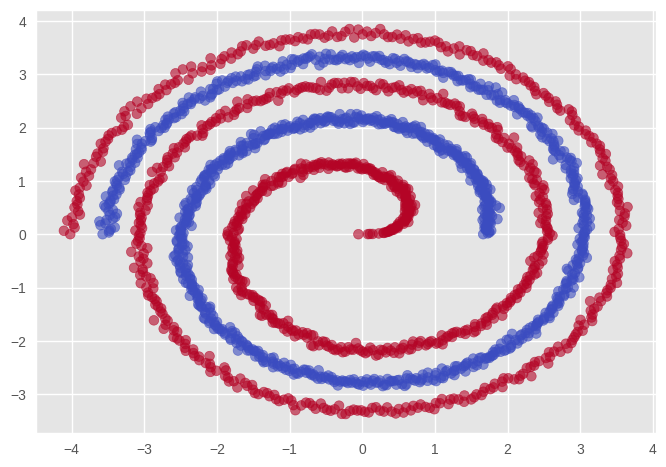

In [29]:
data = f_create_spiral()

plt.scatter(data[:, 0], data[:, 1], c=data[:,2], cmap="coolwarm",alpha=.6)

# Show the plot
plt.show()

In [30]:
size_train = int(0.9 * data.shape[0])
x_train, x_test, y_train, y_test = data[:size_train,:2], data[size_train:,:2], data[:size_train,-1], data[size_train:,-1]


model = LazyClassifier()
result = model.fit(x_train, x_test, y_train, y_test)
result = result[0].sort_values("F1 Score", ascending=False)
result

100%|██████████| 29/29 [00:03<00:00,  7.35it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.58,0.58,None,0.74,0.02
Perceptron,0.50,0.50,None,0.67,0.02
CalibratedClassifierCV,0.34,0.34,None,0.51,0.11
AdaBoostClassifier,0.26,0.26,None,0.41,0.59
RandomForestClassifier,0.12,0.12,None,0.22,0.48
BaggingClassifier,0.12,0.12,None,0.22,0.09
SGDClassifier,0.11,0.11,None,0.20,0.02
ExtraTreeClassifier,0.07,0.07,None,0.13,0.02
NuSVC,0.06,0.06,None,0.11,0.33


Text(0.5, 0.98, 'Spiral Dataset')

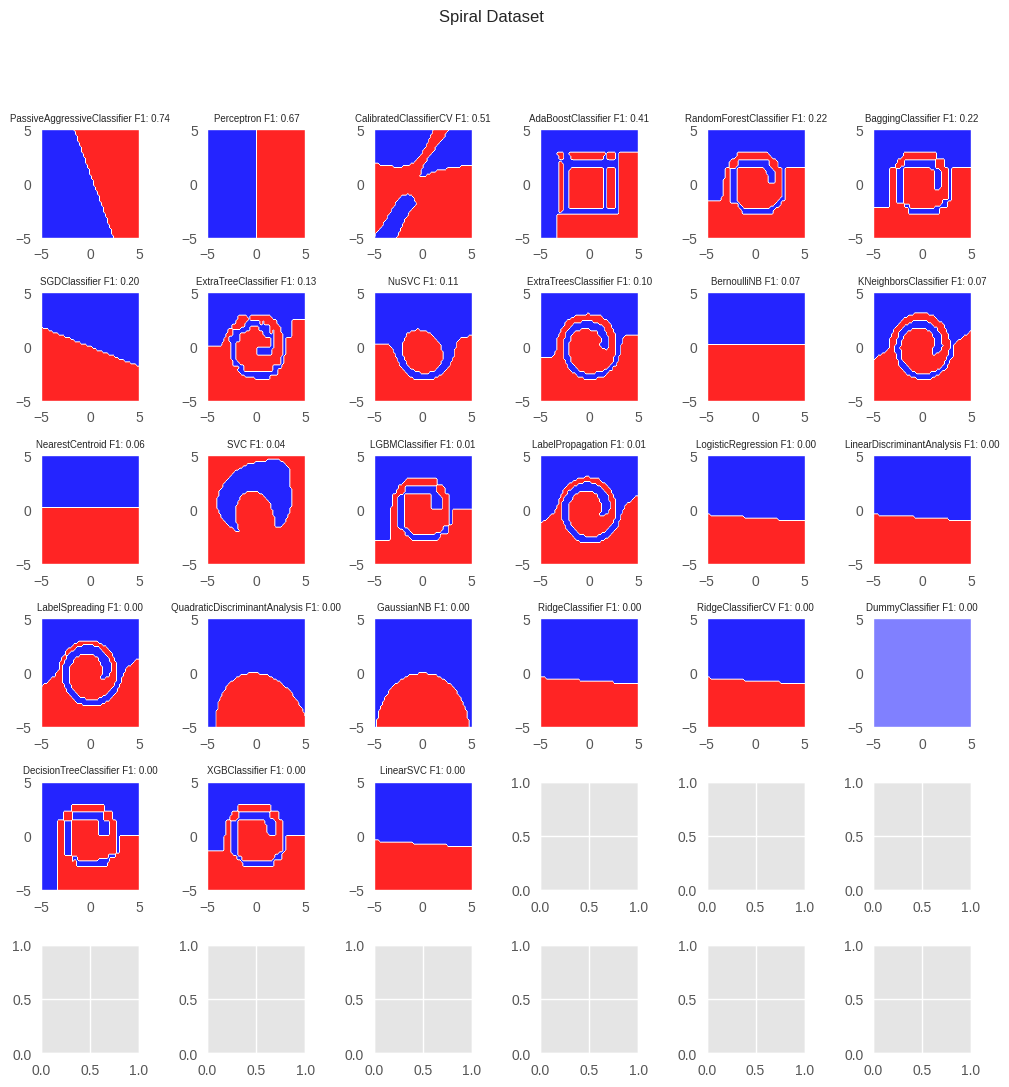

In [31]:
subp_size = ceil(len(model.models)**.5)

fig, ax = plt.subplots(subp_size, subp_size, figsize=(12, 12))

fig.subplots_adjust(wspace=.7,hspace=.5)

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

XY = np.stack((X,Y),axis=2)
XY = XY.reshape(x.shape[0]*y.shape[0], 2)

Z = model.models["SVC"].predict(XY)
Z = Z.reshape(x.shape[0], y.shape[0])

for i, key in enumerate(result.index):

    Z = model.models[key].predict(XY)
    Z = Z.reshape(x.shape[0], y.shape[0])

    ax[i//subp_size, i%subp_size].contourf(X,Y,Z, cmap='bwr')
    ax[i//subp_size, i%subp_size].set_title(f"{key} F1: {result.loc[key]['F1 Score']:.2f}" , fontsize=7)

fig.suptitle('Spiral Dataset')

In [15]:
model_experiment = ClassificationExperiment()
model_experiment.setup(data[:,:2], target = data[:,-1], session_id = 123)

models = model_experiment.compare_models(n_select=100,cross_validation=False)
#df_result = model_experiment.get_leaderboard()

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"0.0: 0, 6.0: 1"
4,Original data shape,"(2000, 3)"
5,Transformed data shape,"(2000, 3)"
6,Transformed train set shape,"(1400, 3)"
7,Transformed test set shape,"(600, 3)"
8,Numeric features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0400
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0300
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0900
xgboost,Extreme Gradient Boosting,0.9983,1.0000,0.9967,1.0000,0.9984,0.9967,0.9967,0.0300
rf,Random Forest Classifier,0.9967,1.0000,0.9967,0.9967,0.9967,0.9933,0.9933,0.0600
dt,Decision Tree Classifier,0.9933,0.9933,0.9934,0.9934,0.9934,0.9867,0.9867,0.0300
lr,Logistic Regression,0.8100,0.9031,0.7902,0.8282,0.8087,0.6202,0.6209,0.0500
qda,Quadratic Discriminant Analysis,0.8017,0.9028,0.7836,0.8185,0.8007,0.6035,0.6041,0.0300


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:41:02
Status,. . . . . . . . . . . . . . . . . .,Creating dataframe
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored